# Import

In [18]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the CSV file into a DataFrame
df = pd.read_csv('reviews.csv')

# Display the first few rows of the DataFrame to verify the data
print(df.head())

   listing_id        id        date  reviewer_id reviewer_name  \
0     7202016  38917982  2015-07-19     28943674        Bianca   
1     7202016  39087409  2015-07-20     32440555         Frank   
2     7202016  39820030  2015-07-26     37722850           Ian   
3     7202016  40813543  2015-08-02     33671805        George   
4     7202016  41986501  2015-08-10     34959538          Ming   

                                            comments  
0  Cute and cozy place. Perfect location to every...  
1  Kelly has a great room in a very central locat...  
2  Very spacious apartment, and in a great neighb...  
3  Close to Seattle Center and all it has to offe...  
4  Kelly was a great host and very accommodating ...  


# Reviews per listing

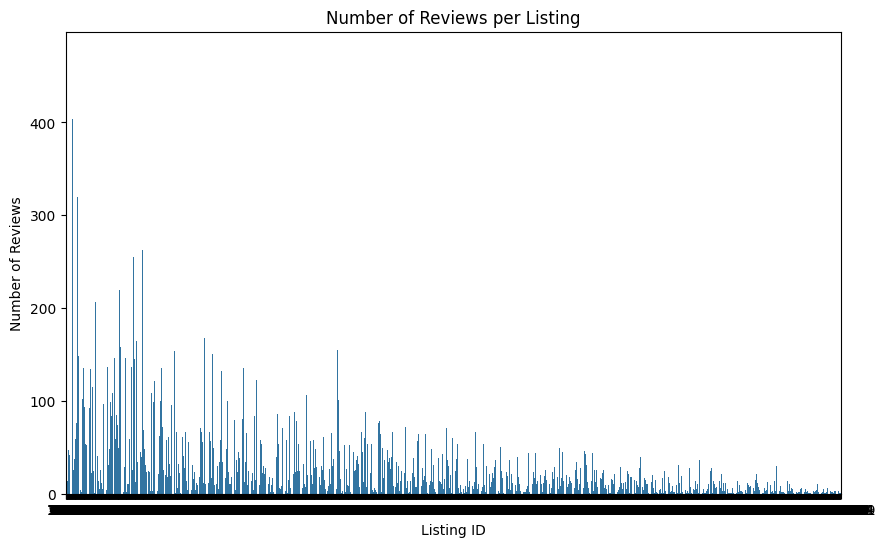

In [12]:
# Analysis 1: Number of reviews per listing
plt.figure(figsize=(10, 6))
review_counts = df['listing_id'].value_counts()
sns.barplot(x=review_counts.index, y=review_counts.values)
plt.title('Number of Reviews per Listing')
plt.xlabel('Listing ID')
plt.ylabel('Number of Reviews')
plt.show()

# Reviews over time

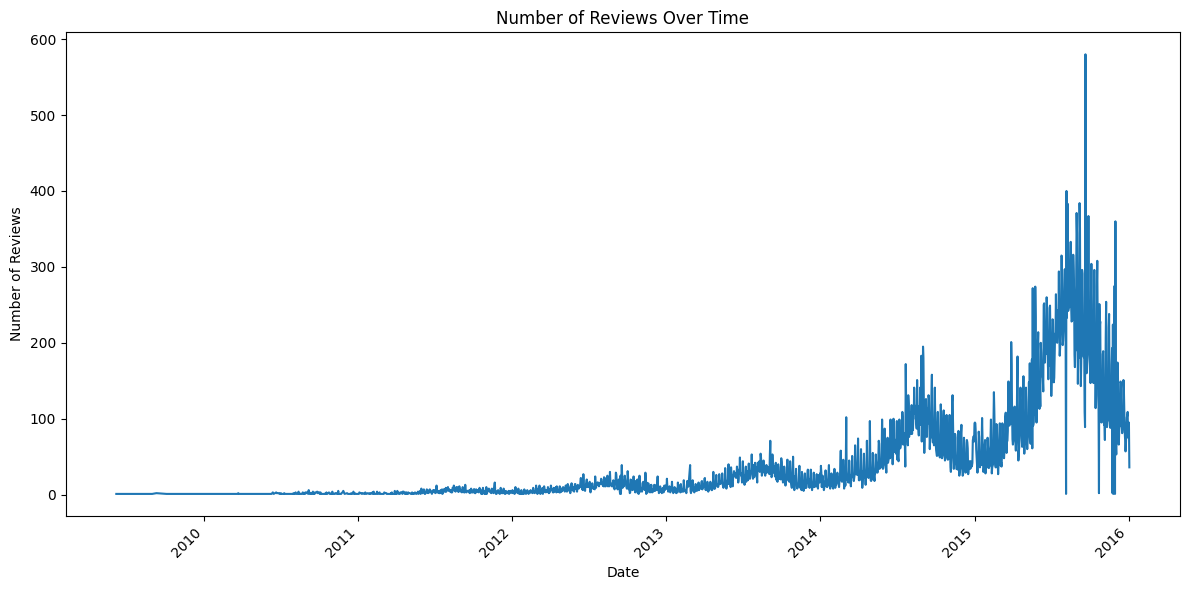

In [13]:
# Analysis 2: Reviews over time
plt.figure(figsize=(12, 6))
df['date'] = pd.to_datetime(df['date'])
df['date'].value_counts().sort_index().plot(kind='line')
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top reviewers

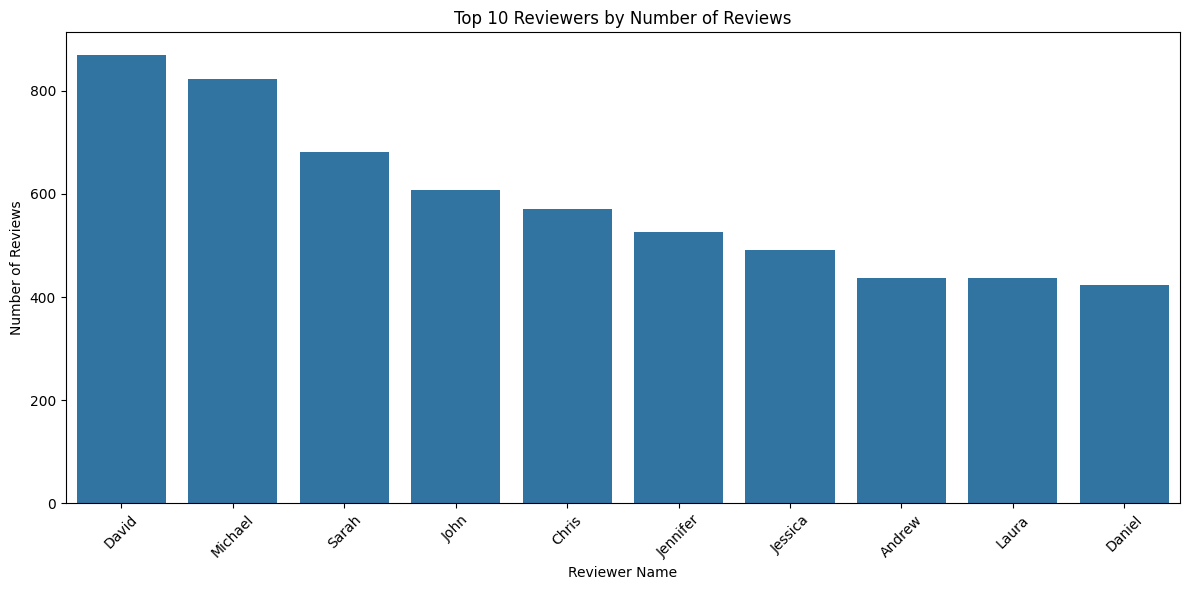

In [14]:
# Analysis 3: Top reviewers by number of reviews
plt.figure(figsize=(12, 6))
top_reviewers = df['reviewer_name'].value_counts().nlargest(10)
sns.barplot(x=top_reviewers.index, y=top_reviewers.values)
plt.title('Top 10 Reviewers by Number of Reviews')
plt.xlabel('Reviewer Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Distribution of review counts

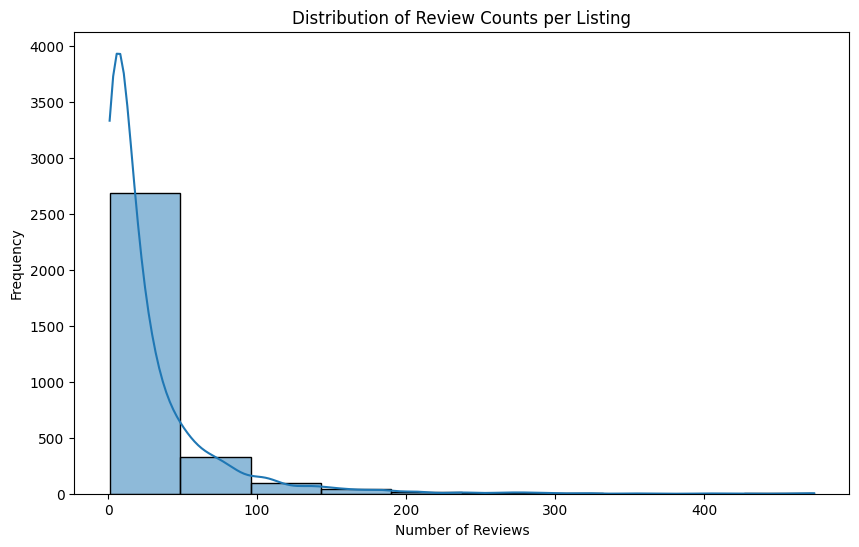

In [15]:
# Analysis 4: Distribution of review counts per listing
plt.figure(figsize=(10, 6))
sns.histplot(df['listing_id'].value_counts(), bins=10, kde=True)
plt.title('Distribution of Review Counts per Listing')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

# Wordcloud

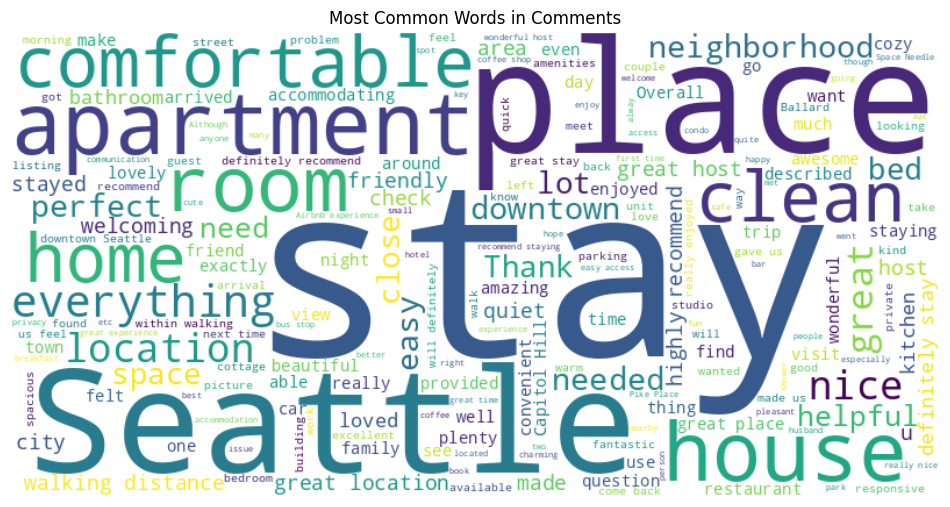

In [20]:
# Analysis 5: Word cloud of most common words in comments
plt.figure(figsize=(12, 8))
df['comments'] = df['comments'].fillna('').astype(str)
text = ' '.join(df['comments'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Comments')
plt.show()